In [2]:
# 📚 Librerie essenziali
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Carica dataset biomeccanico già pulito
df = pd.read_csv("../data/processed/data_biomech_ready.csv")

# 🔍 Seleziona solo le feature biomeccaniche
features_biomech = [
    "HR V", "HR ML", "HR AP",
    "%det V", "%det ML", "%det AP",
    "Tilt", "Obliquity", "Rotation",
    "Stance", "Swing", "Double Support", "Single Support",
    "Stride Length", "Cadence", "Gait Speed"
]

df_bio = df[features_biomech].copy()

# 🔎 Controlla eventuali valori mancanti
print("🔍 Valori mancanti per colonna:\n")
print(df_bio.isnull().mean().sort_values(ascending=False))

# 🧮 Statistiche base (opzionale)
display(df_bio.describe())

🔍 Valori mancanti per colonna:

HR V              0.0
HR ML             0.0
HR AP             0.0
%det V            0.0
%det ML           0.0
%det AP           0.0
Tilt              0.0
Obliquity         0.0
Rotation          0.0
Stance            0.0
Swing             0.0
Double Support    0.0
Single Support    0.0
Stride Length     0.0
Cadence           0.0
Gait Speed        0.0
dtype: float64


,HR V,HR ML,HR AP,%det V,%det ML,%det AP,Tilt,Obliquity,Rotation,Stance,Swing,Double Support,Single Support,Stride Length,Cadence,Gait Speed
count,2.760000e+02,2.760000e+02,2.760000e+02,276.000000,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02
mean,7.594569e-16,1.287215e-17,6.822240e-16,0.000000,-2.574430e-17,-2.316987e-16,2.767512e-16,1.544658e-16,3.539842e-17,5.110244e-15,5.245402e-16,-1.029772e-16,1.029772e-16,-1.287215e-16,-2.059544e-16,1.029772e-16
std,1.001817e+00,1.001817e+00,1.001817e+00,1.001817,1.001817e+00,1.001817e+00,1.001817e+00,1.001817e+00,1.001817e+00,1.001817e+00,1.001817e+00,1.001817e+00,1.001817e+00,1.001817e+00,1.001817e+00,1.001817e+00
min,-2.247911e+00,-1.982206e+00,-1.947066e+00,-2.391337,-2.075696e+00,-1.871769e+00,-1.671168e+00,-1.655988e+00,-1.492121e+00,-2.220118e+00,-2.659870e+00,-1.134875e+00,-1.302490e+00,-1.137413e+00,-5.893693e+00,-1.203965e+00
25%,-6.930976e-01,-7.498365e-01,-7.807676e-01,-0.842008,-7.539465e-01,-9.708668e-01,-6.242986e-01,-7.562117e-01,-7.069889e-01,-7.903028e-01,-5.873727e-01,-7.502491e-01,-9.822292e-01,-4.463446e-01,-6.073420e-01,-6.600370e-01
50%,-1.497199e-01,-8.084341e-02,-6.802957e-02,0.225375,8.345923e-02,1.584653e-01,-1.697369e-01,-1.376153e-01,-1.888016e-01,1.557613e-01,-6.799273e-02,-6.582662e-01,4.445658e-01,-2.729492e-01,1.870010e-01,-4.062667e-01
75%,6.900050e-01,5.531542e-01,5.803295e-01,0.755628,7.890143e-01,8.230053e-01,4.019087e-01,5.709588e-01,4.765981e-01,5.949857e-01,8.105330e-01,1.229372e+00,5.631030e-01,-7.568064e-02,6.816351e-01,1.030347e+00
max,3.354439e+00,2.938373e+00,4.783241e+00,1.796619,1.826449e+00,1.848936e+00,5.023285e+00,3.427750e+00,4.145129e+00,2.727341e+00,4.362309e+00,1.667167e+00,1.055039e+01,1.053787e+01,2.494935e+00,9.498808e+00


🔍 PCA: numero componenti selezionate = 11
📉 Varianza spiegata cumulativa: 95.85%


/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


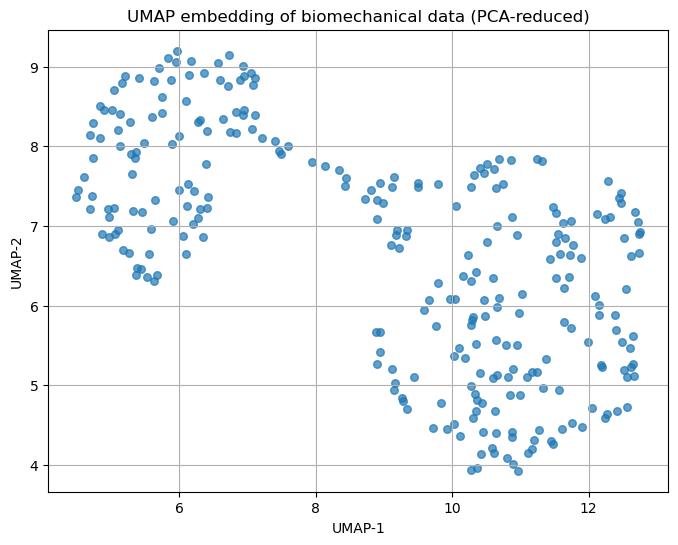

In [3]:
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt

# 🎯 PCA: manteniamo il 95% della varianza
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(df_bio)

print(f"🔍 PCA: numero componenti selezionate = {X_pca.shape[1]}")
print(f"📉 Varianza spiegata cumulativa: {np.sum(pca.explained_variance_ratio_):.2%}")

# 🌌 UMAP: embedding 2D su dati PCA-reduced
reducer = umap.UMAP(n_components=2, random_state=42, min_dist=0.1, n_neighbors=15)
X_umap = reducer.fit_transform(X_pca)

# 🎨 Visualizzazione
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=30, alpha=0.7)
plt.title("UMAP embedding of biomechanical data (PCA-reduced)")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

🔢 Cluster trovati (escludendo outliers): 5
🧨 Outliers rilevati: 40


/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/2296391913.py:21: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


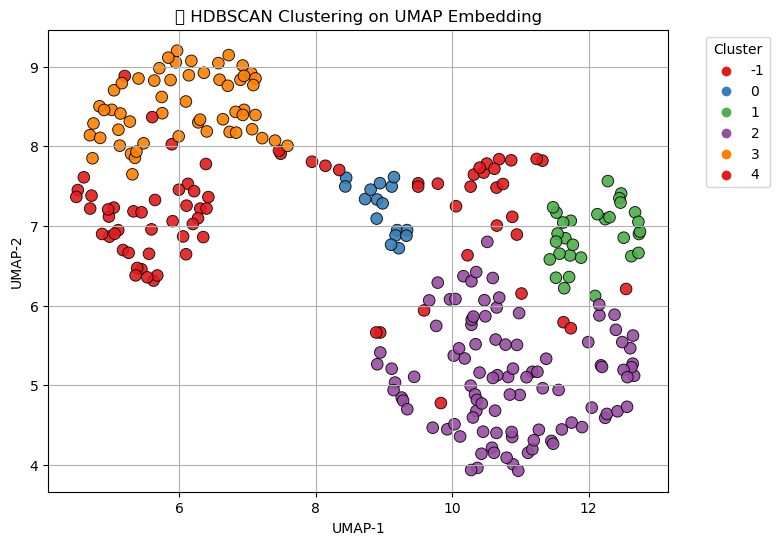

In [4]:
import hdbscan
import seaborn as sns

# 🔍 Inizializza e allena HDBSCAN sullo spazio UMAP
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5, prediction_data=True)
cluster_labels = clusterer.fit_predict(X_umap)

# 📌 Aggiungi le etichette al DataFrame
df_bio["cluster"] = cluster_labels

# 🧮 Conteggio dei cluster e outliers
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"🔢 Cluster trovati (escludendo outliers): {n_clusters}")
print(f"🧨 Outliers rilevati: {n_noise}")

# 🌌 Visualizzazione UMAP con colori per cluster
plt.figure(figsize=(8,6))
palette = sns.color_palette("Set1", n_colors=n_clusters)
sns.scatterplot(
    x=X_umap[:, 0], y=X_umap[:, 1],
    hue=cluster_labels, palette=palette,
    s=70, edgecolor='black', alpha=0.9
)
plt.title("🧬 HDBSCAN Clustering on UMAP Embedding")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


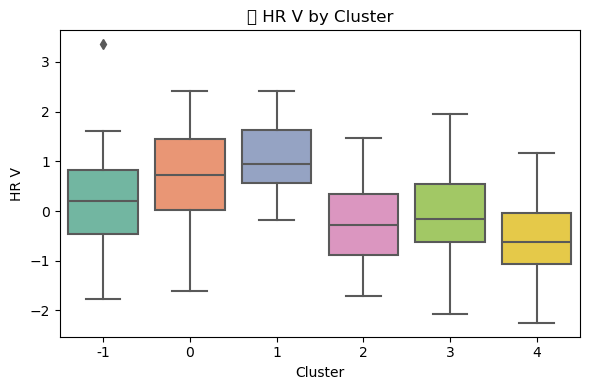

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


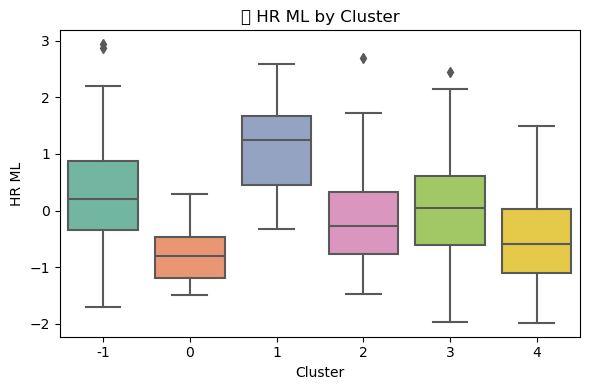

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


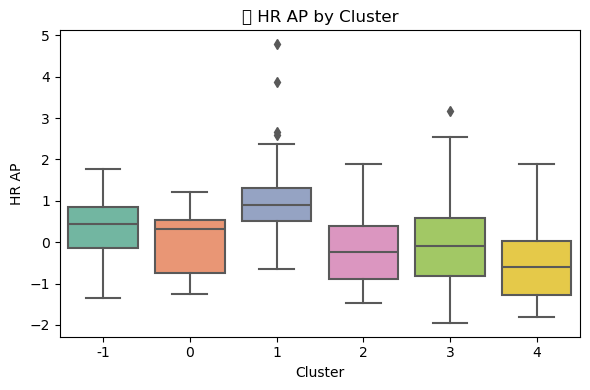

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


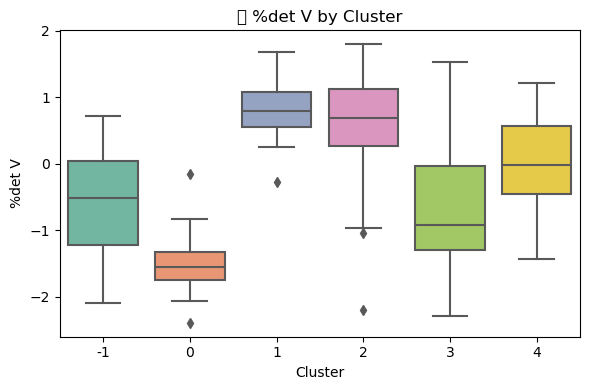

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


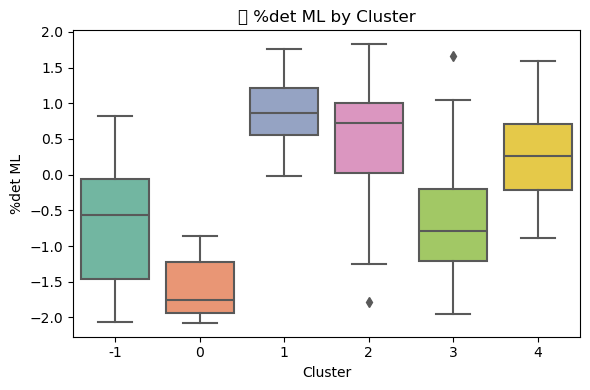

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


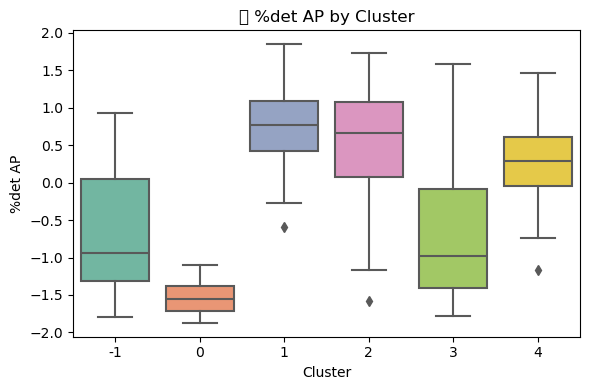

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


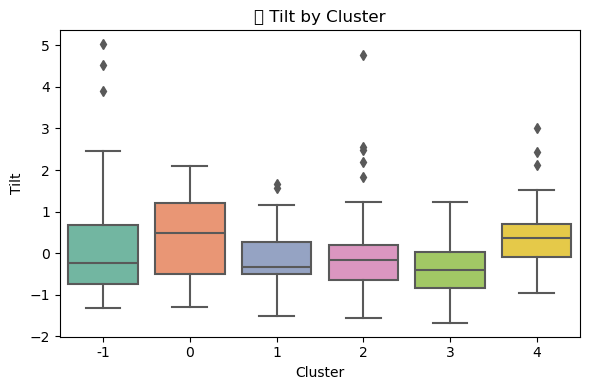

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


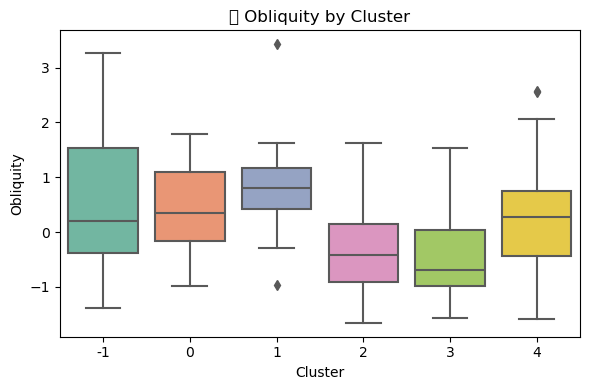

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


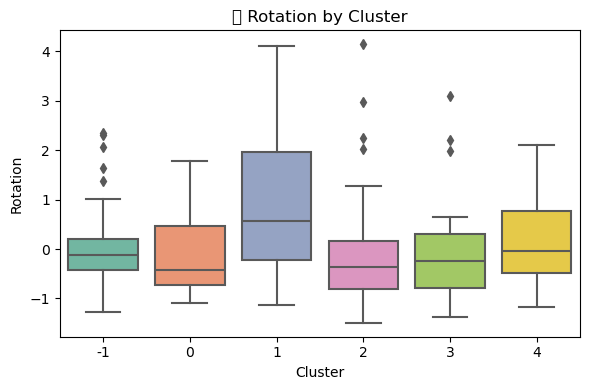

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


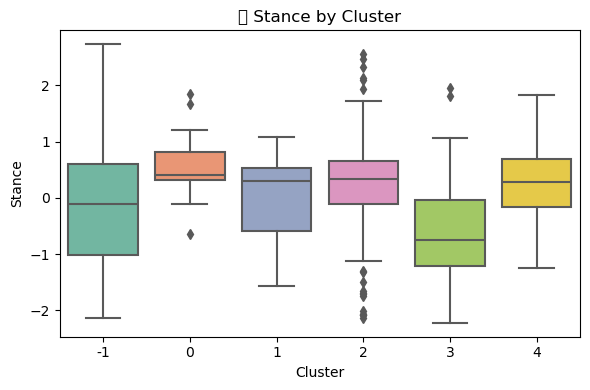

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


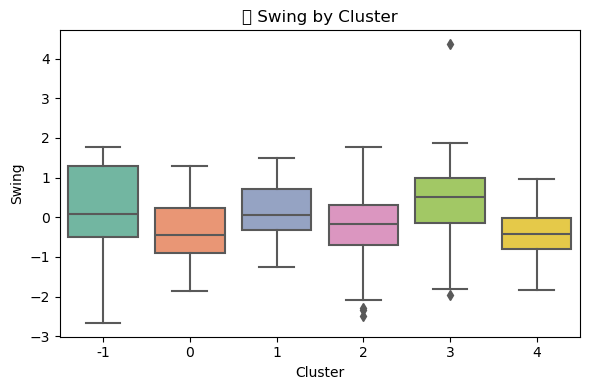

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


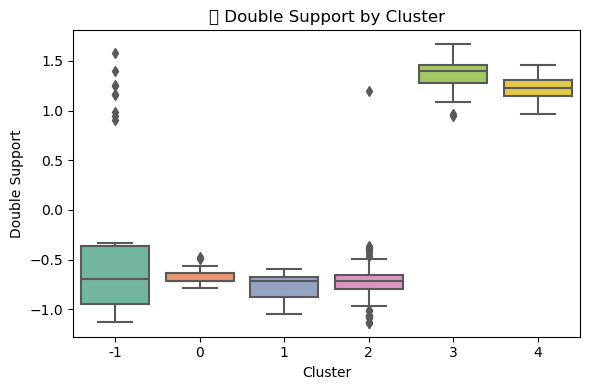

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


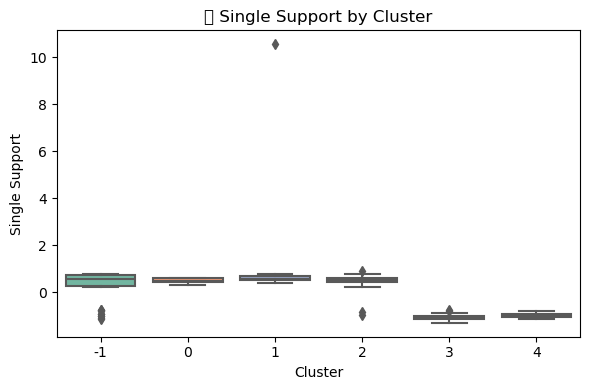

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


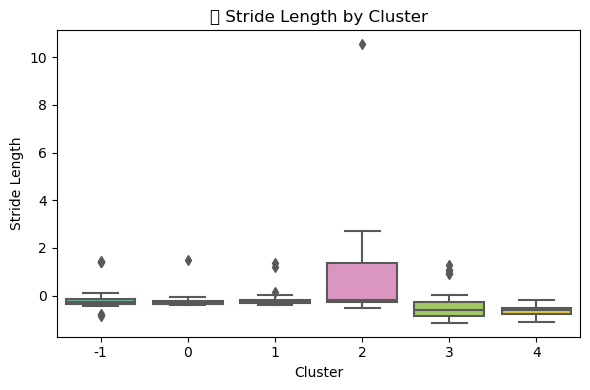

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


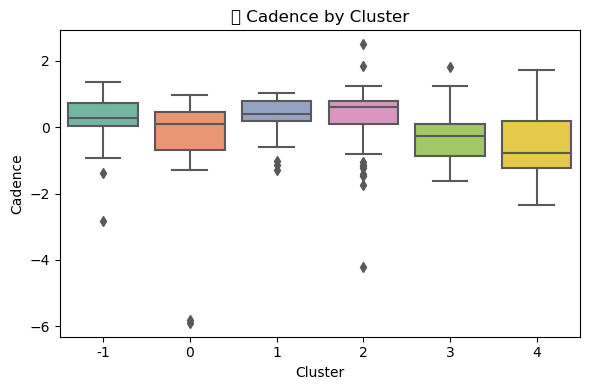

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/60464526.py:12: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


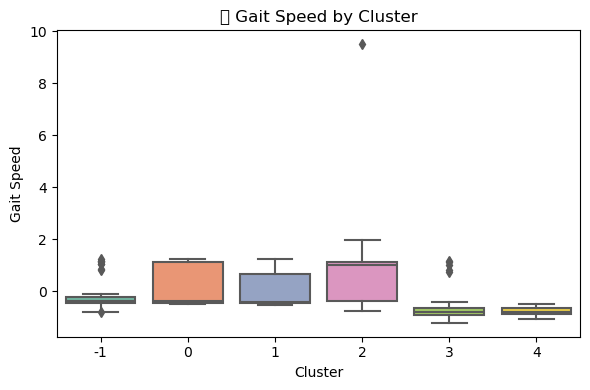

In [5]:
import matplotlib.pyplot as plt

features = df_bio.columns.drop("cluster")

# 📊 Distribuzioni per cluster
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="cluster", y=col, data=df_bio, palette="Set2")
    plt.title(f"📦 {col} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/2755662892.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


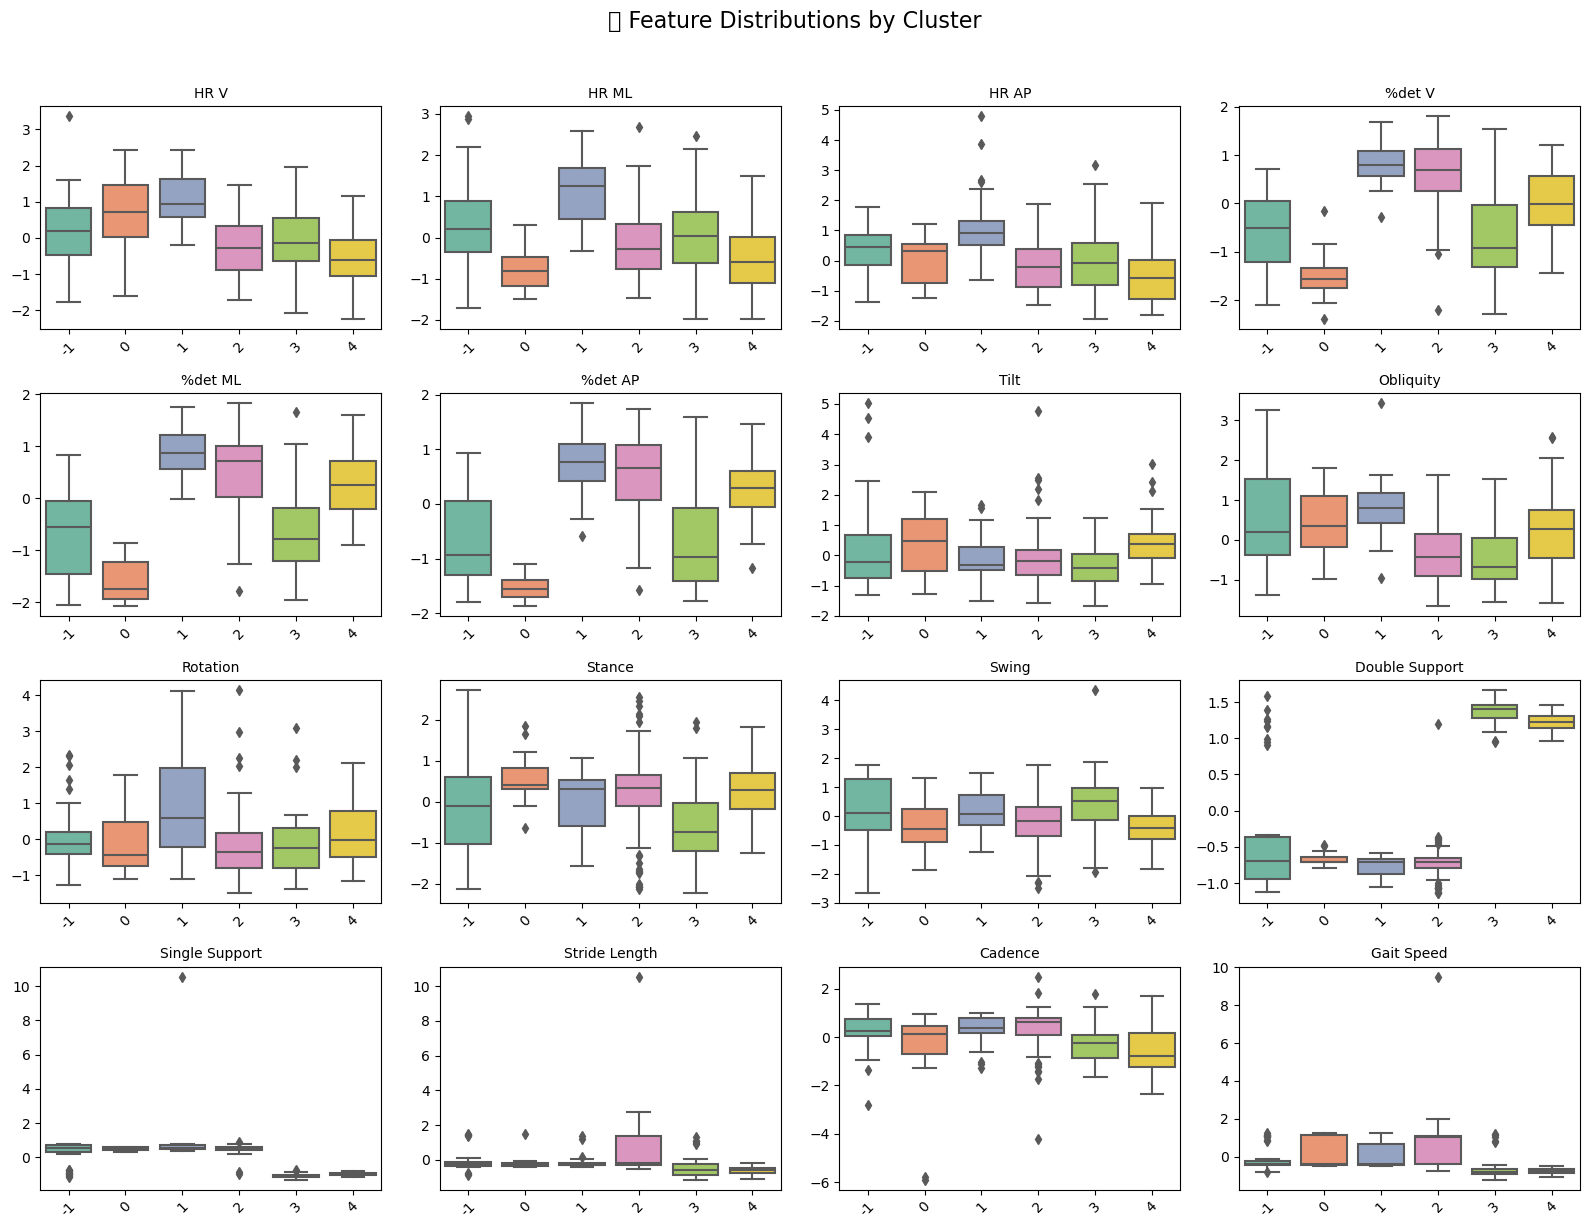

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definisci le feature da visualizzare
features = df_bio.columns.drop("cluster")

# 📦 Griglia 4x4
n_features = len(features)
n_cols = 4
n_rows = int(np.ceil(n_features / n_cols))

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x="cluster", y=col, data=df_bio, palette="Set2")
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=45)

plt.suptitle("📊 Feature Distributions by Cluster", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, classification_report
import shap
import numpy as np
import matplotlib.pyplot as plt

# 📦 Dati
df_valid = df_bio[df_bio["cluster"] != -1].copy()
X = df_valid.drop(columns=["cluster"])
y = df_valid["cluster"]

# 🎯 Parametri di ricerca (puoi espandere)
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# 🔁 CV e ricerca
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
search = RandomizedSearchCV(
    rf, param_distributions=param_grid,
    n_iter=30, cv=cv, scoring='f1_weighted', n_jobs=-1, random_state=42, verbose=1
)
search.fit(X, y)

print(f"✅ Best Score (CV): {search.best_score_:.3f}")
print("🔧 Best Params:", search.best_params_)

# 🎯 Classificatore ottimizzato
best_model = search.best_estimator_

# 🧠 SHAP su modello finale
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Best Score (CV): 0.939
🔧 Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


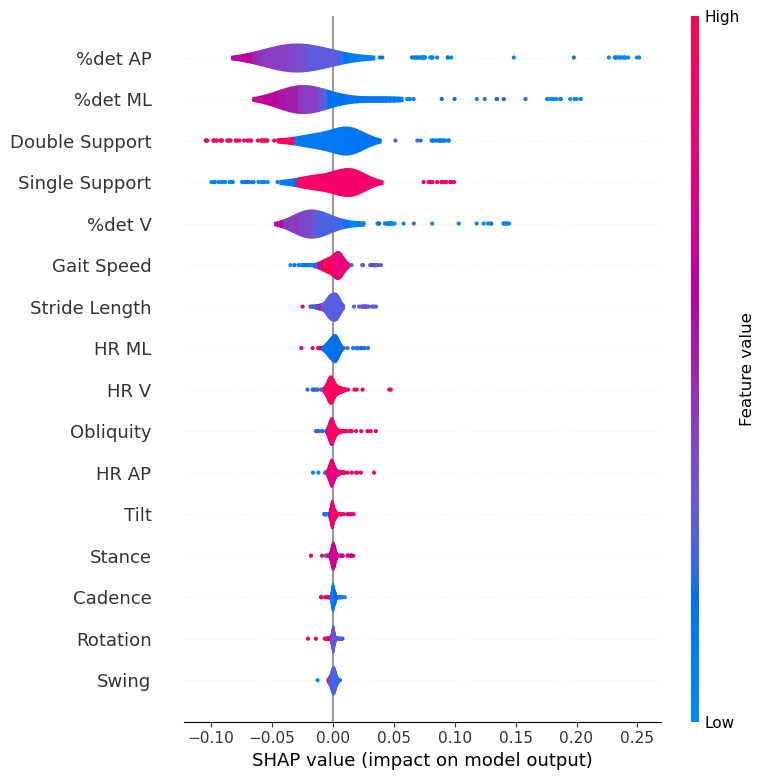

In [31]:
import numpy as np

# Ricomponi l'array completo
shap_values_all = np.stack(shap_values, axis=0)  # (236, 16, 5)

# Ora puoi visualizzare, ad esempio, SHAP summary per la classe 0
import shap
shap.summary_plot(shap_values_all[:, :, 0], X, plot_type="violin")

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/3680427820.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


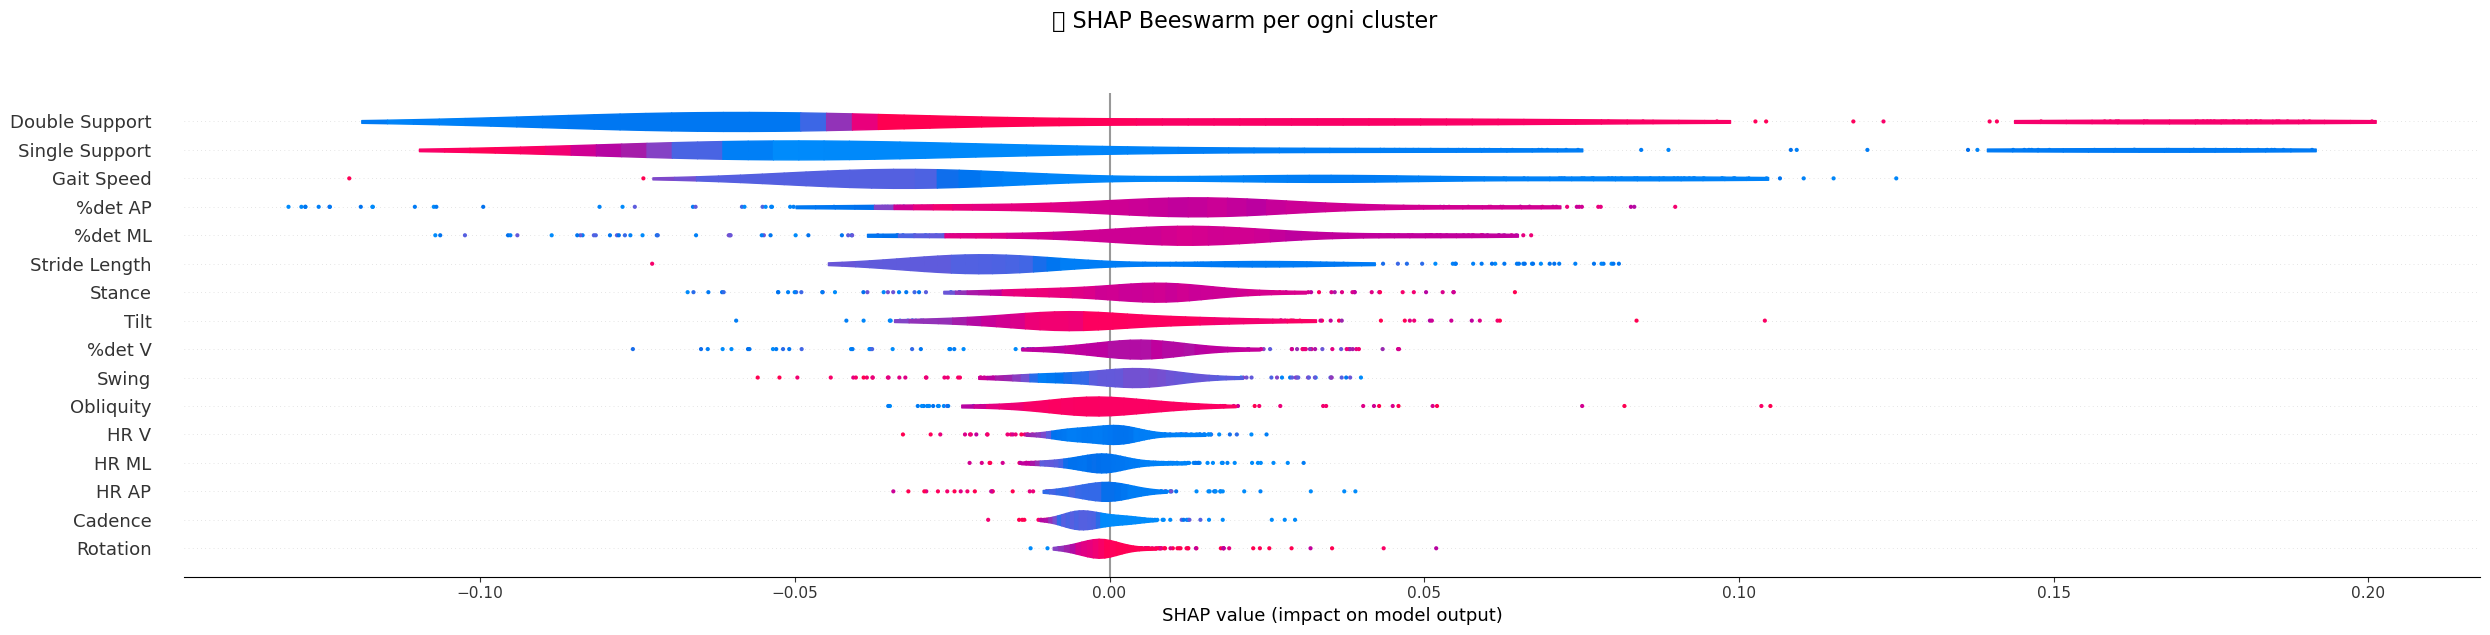

In [32]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Assumendo: shap_values_all.shape = (n_samples, n_features, n_classes)
n_classes = shap_values_all.shape[2]

# 📐 Setup figura multipla
fig, axes = plt.subplots(1, n_classes, figsize=(5 * n_classes, 6), sharey=True)

# Se c'è solo 1 classe (per sicurezza)
if n_classes == 1:
    axes = [axes]

for i in range(n_classes):
    ax = axes[i]
    shap.summary_plot(
        shap_values_all[:, :, i], X,
        plot_type="violin",
        show=False,
        plot_size=None,  # Evita override di figsize
        color_bar=False
    )
    ax.set_title(f"Cluster {i}", fontsize=12)

plt.suptitle("📊 SHAP Beeswarm per ogni cluster", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/4071895227.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


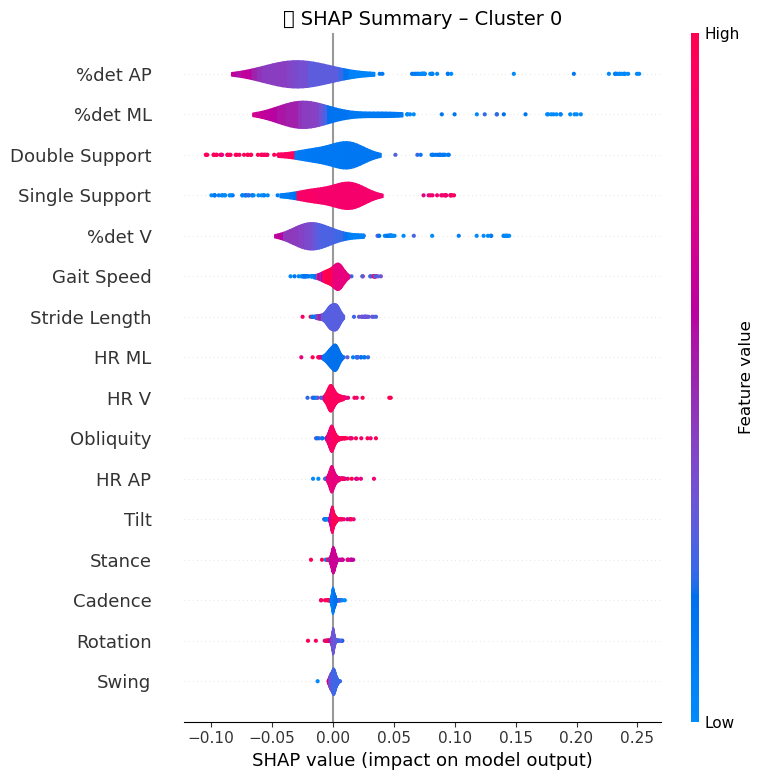

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/4071895227.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


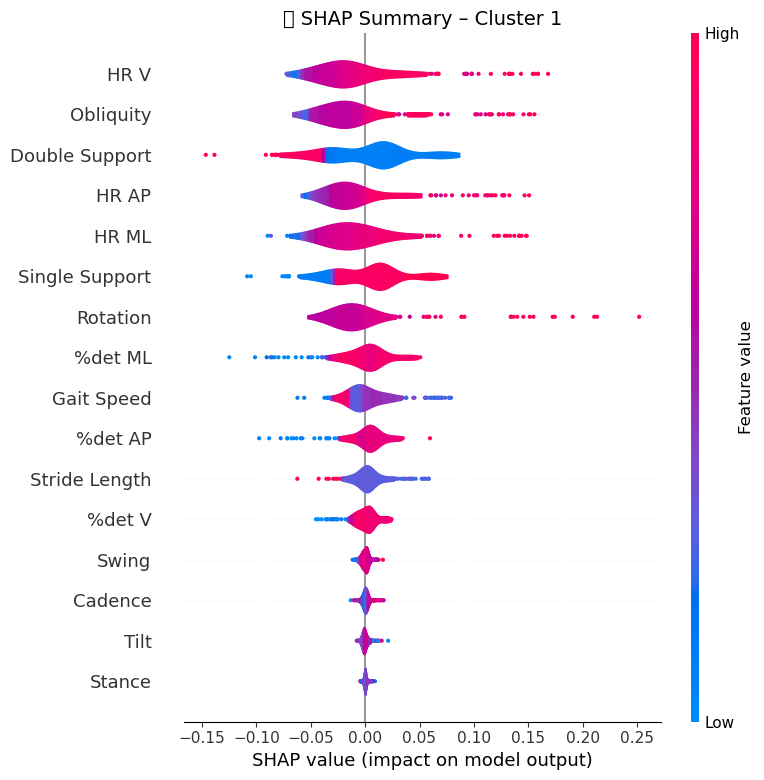

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/4071895227.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


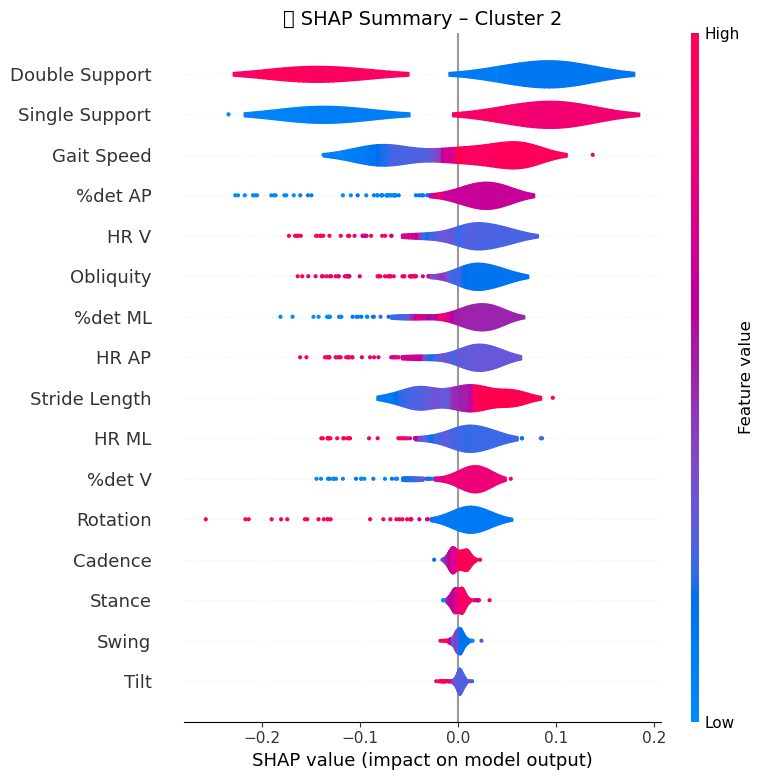

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/4071895227.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


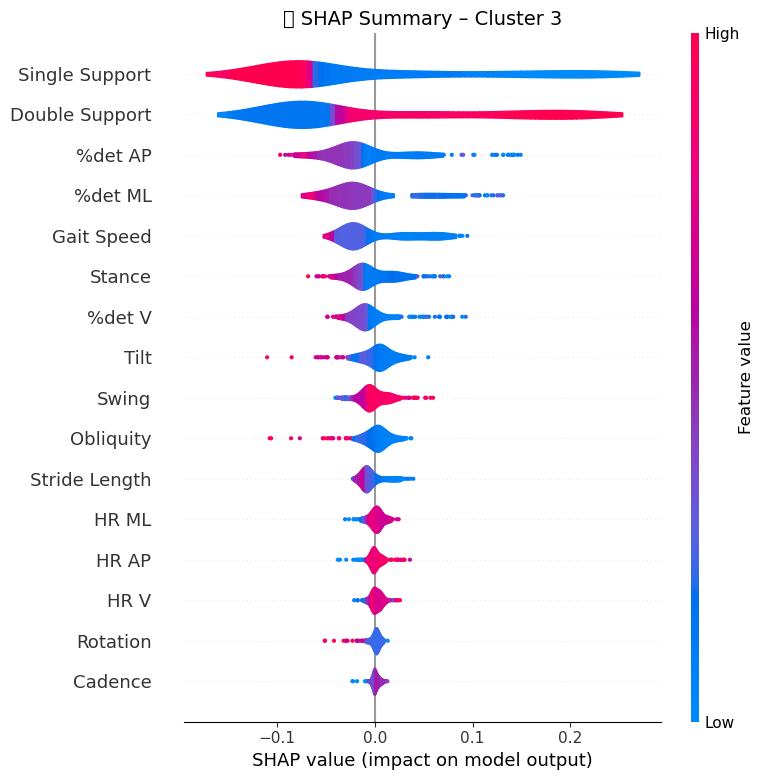

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/4071895227.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


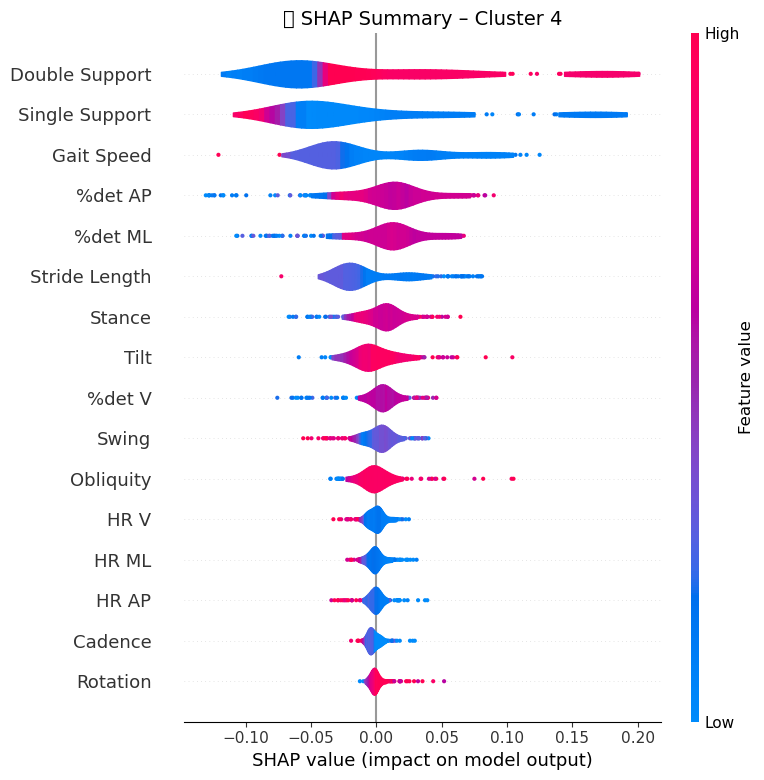

In [33]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Assumiamo che shap_values_all abbia shape (n_samples, n_features, n_clusters)
n_clusters = shap_values_all.shape[2]

# Cicla e disegna un summary plot separato per ogni cluster
for i in range(n_clusters):
    plt.figure(figsize=(6, 6))
    shap.summary_plot(
        shap_values_all[:, :, i],
        X,
        plot_type="violin",
        show=False
    )
    plt.title(f"📊 SHAP Summary – Cluster {i}", fontsize=14)
    plt.tight_layout()
    plt.show()

🔵 Cluster 0 – beeswarmclass0_8.png
Le feature %det AP, %det ML, Double Support e Single Support sono tra le più determinanti.

L’impatto maggiore è dato dai pattern di stabilità laterale e antero-posteriore.

L’alta importanza di %det ML/AP suggerisce un cluster con andatura disorganizzata ma compensata.

Gait Speed e Stride Length influenzano ma con impatto più neutro.

🧠 Possibile fenotipo: soggetti con alterato controllo multi-direzionale, ma con andatura ancora funzionale.

🔵 Cluster 1 – beeswarmclass1_9.png
HR V, Obliquity, Double Support e HR AP sono dominanti.

C’è forte rilevanza delle variazioni pelviche e dei movimenti verticali della testa.

Pattern con distribuzione SHAP ampia, che suggerisce eterogeneità nel cluster.

🧠 Possibile fenotipo: soggetti con alterazioni posturali compensatorie (es. movimento testa-pelvi accentuato) e alto dispendio energetico.

🔵 Cluster 2 – beeswarmclass2_10.png
Fortissimo impatto di Double/Single Support, Gait Speed e %det AP.

Il plot mostra un alto impatto asimmetrico, con SHAP positivi molto pronunciati.

Stride Length, HR V e Obliquity presenti ma secondari.

🧠 Possibile fenotipo: soggetti con stabilità dinamica compromessa, probabilmente rallentati e con appoggio prolungato – cluster fragile.

🔵 Cluster 3 – beeswarmclass3_11.png
Prevalenza di Single Support, Double Support, %det AP/ML.

Le distribuzioni SHAP sono più compatte e simmetriche → cluster più coerente internamente.

Le variazioni su Cadence, Rotation e HR sono minime.

🧠 Possibile fenotipo: soggetti con strategie conservative omogenee, probabilmente in fase intermedia della malattia.

🔵 Cluster 4 – beeswarmclass4_12.png
Ancora una volta Double/Single Support al top, seguiti da Gait Speed e %det AP.

Interessante: Stance e Tilt tornano visibili, quindi c’è un pattern più legato al controllo tronco-gamba.

Cluster differente dagli altri per combinazione medio-alto impatto su supporto + angoli posturali.

🧠 Possibile fenotipo: soggetti con alterazione posturale moderata ma stabilità discreta, potenzialmente candidati a training riabilitativo mirato.

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/15452018.py:46: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  plt.tight_layout()
/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/15452018.py:47: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  plt.savefig(filename)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


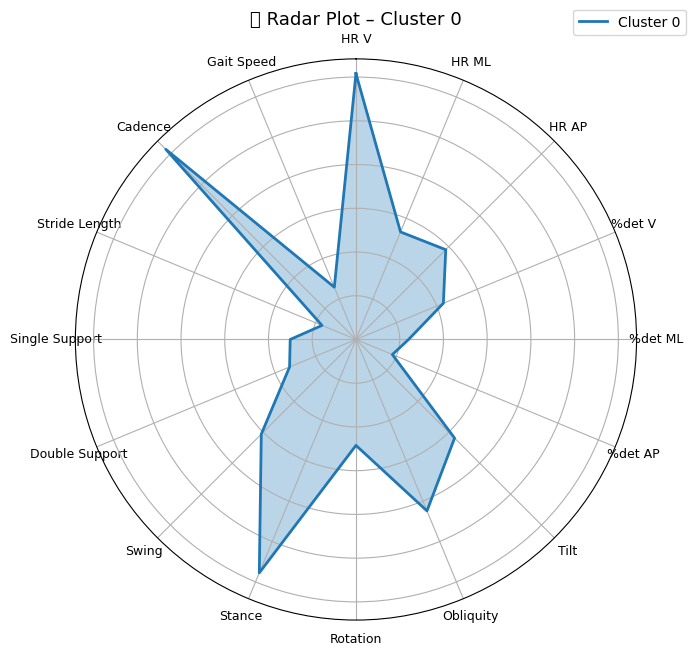

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/15452018.py:46: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  plt.tight_layout()
/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/15452018.py:47: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  plt.savefig(filename)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


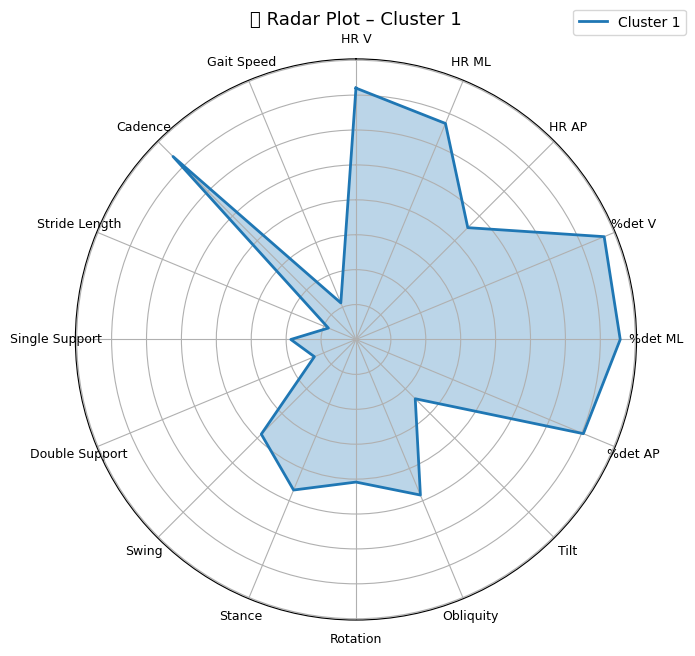

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/15452018.py:46: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  plt.tight_layout()
/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/15452018.py:47: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  plt.savefig(filename)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


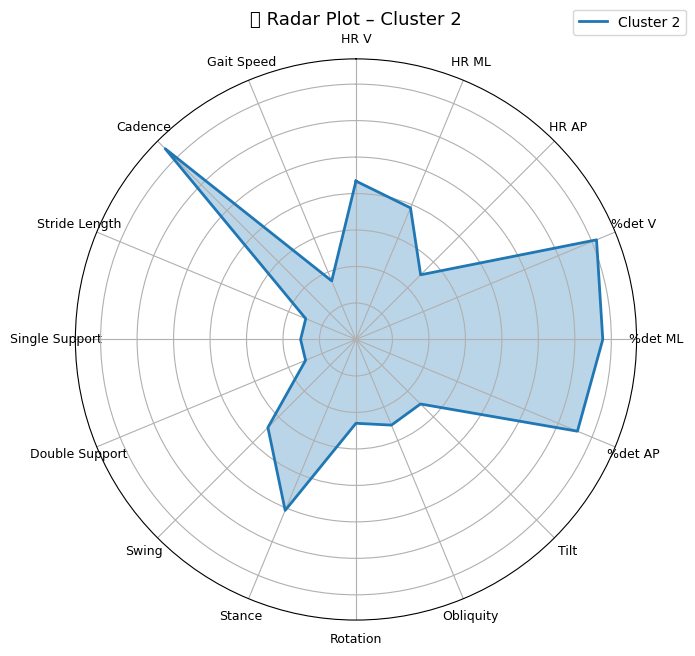

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/15452018.py:46: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  plt.tight_layout()
/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/15452018.py:47: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  plt.savefig(filename)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


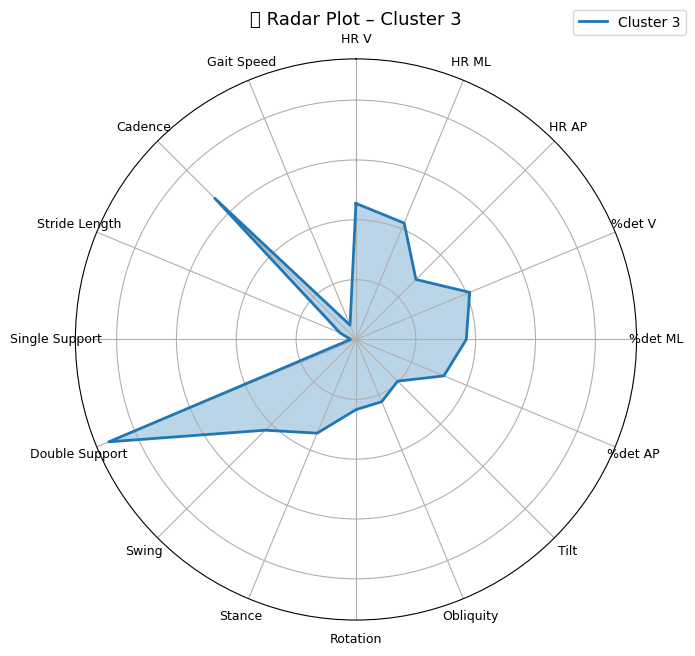

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/15452018.py:46: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  plt.tight_layout()
/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/15452018.py:47: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  plt.savefig(filename)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


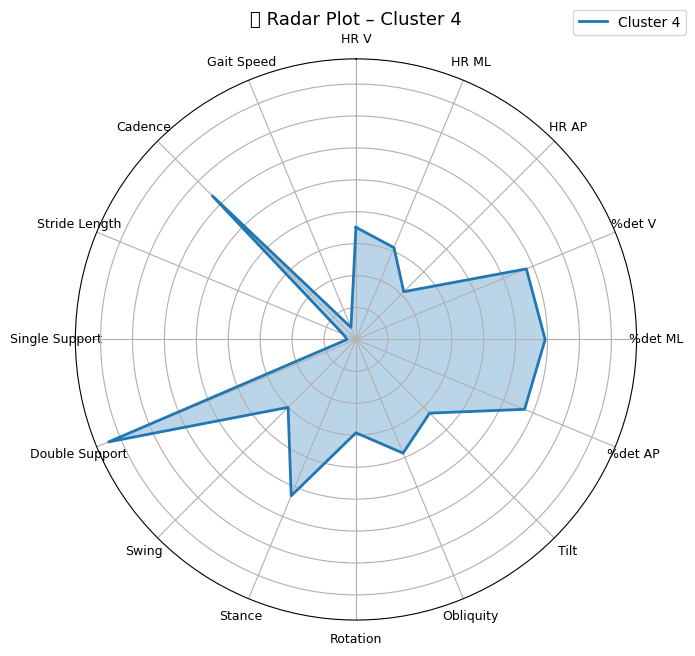

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from math import pi

# 🔁 Crea cartella se non esiste
radar_dir = "outputs/figures"
os.makedirs(radar_dir, exist_ok=True)

# 📦 Dati filtrati
df_valid = df_bio[df_bio["cluster"] != -1].copy()
features = df_valid.drop(columns=["cluster"]).columns.tolist()
clusters = sorted(df_valid["cluster"].unique())

# 🔄 Normalizzazione (min-max)
df_norm = df_valid.copy()
for col in features:
    min_val = df_valid[col].min()
    max_val = df_valid[col].max()
    df_norm[col] = (df_valid[col] - min_val) / (max_val - min_val + 1e-8)

# 📊 Radar plot per ciascun cluster
for c in clusters:
    values = df_norm[df_norm["cluster"] == c][features].mean().values.tolist()
    values += values[:1]  # chiusura poligono

    angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
    angles += angles[:1]  # chiusura cerchio

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {c}')
    ax.fill(angles, values, alpha=0.3)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=9)
    ax.set_yticklabels([])
    ax.set_title(f"📡 Radar Plot – Cluster {c}", fontsize=13)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # 💾 Salvataggio
    filename = os.path.join(radar_dir, f"radarplot_cluster{c}.png")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

🔵 Cluster 0 – Firma Biomeccanica
Alta HR V (Harmonic Ratio verticale) e Cadence, suggerendo passo stabile e frequente.

%det ML, %det AP e %det V molto basse → cammino meno deterministico → variabilità e possibile instabilità.

Alta Stance e valori medi per Obliquity e Tilt.

Interpretazione: potrebbe rappresentare soggetti con cammino più frequente e stabile in verticale, ma con instabilità nel controllo antero-posteriore e medio-laterale.

🟢 Cluster 1 – Firma Biomeccanica
Molto alte %det V, ML, AP → forte determinismo → cammino altamente riproducibile.

Elevati HR ML e HR V, suggerendo simmetria e stabilità.

Gait Speed, Cadence e Stride Length non massime ma buone.

Interpretazione: cluster “ottimale” → soggetti con ottima stabilità e ripetitività del cammino, potenzialmente normativi.

🔴 Cluster 2 – Firma Biomeccanica
Alta Cadence, %det ML, %det AP, %det V, e Double Support.

Bassa HR V, Stride Length e Gait Speed.

Interpretazione: soggetti con frequenza alta ma cammino “corto”, possibile compensazione motoria in soggetti fragili o con deficit neuromuscolari.

🟡 Cluster 3 – Firma Biomeccanica
Molto alta Double Support → tempo maggiore con entrambi i piedi a terra → tipico di soggetti con insicurezza posturale.

Bassa Single Support, HR V, Stride Length, Gait Speed.

Interpretazione: gruppo con probabilmente peggior performance funzionale → cammino conservativo e insicuro, verosimilmente soggetti patologici.

🟣 Cluster 4 – Firma Biomeccanica
Simile al cluster 3 per Double Support alta e Cadence discreta.

Tuttavia: valori medi di determinismo (%det) e HR.

Interpretazione: profilo intermedio tra soggetti instabili (cluster 3) e “normali” (cluster 1). Potrebbero essere soggetti con lievi alterazioni del cammino o compensazioni funzionali efficaci.

## FIRME BIOMECCANICHE

🧠 Cluster 0 – Profilo Biomeccanico Clinico
Il cluster 0 presenta una firma caratterizzata da elevata stabilità verticale (HR V) e alta frequenza di passo (Cadence), suggerendo una buona simmetria e ritmo. Tuttavia, si osserva un basso determinismo del cammino (%det ML, AP, V), indice di maggiore variabilità nella strategia motoria. La velocità e l’ampiezza del passo risultano contenute, indicando strategie conservative, probabilmente adottate per compensare deficit nel controllo fine del movimento.

📌 Interpretazione clinica: soggetti potenzialmente compensati, con buona efficienza ritmica ma instabilità direzionale. Da monitorare per rischio futuro.

🧠 Cluster 1 – Profilo Biomeccanico Clinico
Il cluster 1 mostra una firma fortemente ottimizzata: elevatissimi livelli di determinismo (%det ML, AP, V) e alti indici di armonicità (HR V, HR ML), combinati con una velocità del cammino regolare e passo ampio. L’asimmetria e l’instabilità sono minime, così come il tempo in doppio appoggio.

📌 Interpretazione clinica: questo gruppo rappresenta verosimilmente soggetti normativi o con ottima capacità motoria, da considerare come controllo biomeccanico ideale.

🧠 Cluster 2 – Profilo Biomeccanico Clinico
I soggetti del cluster 2 mostrano un profilo di alta frequenza (Cadence) associata a un passo corto e bassa velocità, ma con elevato determinismo. Il tempo di doppio appoggio è aumentato, suggerendo una certa insicurezza o prudenza nella progressione.

📌 Interpretazione clinica: soggetti con buon controllo neuromuscolare ma che adottano uno schema cauto e frequente, verosimilmente per fragilità posturale o condizione neurologica lieve.

🧠 Cluster 3 – Profilo Biomeccanico Clinico
La firma del cluster 3 è chiaramente patologica: doppio supporto marcato, singolo supporto ridotto, e bassa armonicità (HR). Velocità e passo sono limitati, mentre il determinismo è medio-basso. Questo profilo suggerisce un cammino instabile, breve e frammentato, con strategie compensatorie evidenti.

📌 Interpretazione clinica: gruppo ad alta probabilità di includere soggetti neurologici o con disfunzione motoria marcata, potenzialmente candidati a valutazione clinica prioritaria.

🧠 Cluster 4 – Profilo Biomeccanico Clinico
Il cluster 4 presenta una firma intermedia: il determinismo è moderato, le armonicità non sono particolarmente elevate, ma la velocità e l’ampiezza del passo sono mantenute, con doppio supporto aumentato. Ciò suggerisce strategie di compenso efficaci.

📌 Interpretazione clinica: soggetti con lievi alterazioni del cammino o strategie adattive che permettono di mantenere buone prestazioni funzionali nonostante deficit posturali.

✅ Fase 2 – Profilazione narrativa dei cluster
Calcolo delle feature top SHAP per ciascun cluster

Generazione di un commento automatico in stile clinico

Salvataggio dei grafici a barre orizzontali (SHAP mean(|value|) per cluster)

In [37]:
import os
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# 📁 Directory output
os.makedirs("outputs/figures", exist_ok=True)
os.makedirs("outputs/text", exist_ok=True)

# 🎯 Dati e SHAP values (li avrai già ottenuti con best_model)
# Assumiamo:
# - df_valid: contiene X + colonna 'cluster'
# - X: solo le feature (senza 'cluster')
# - shap_values_all: shape (n_samples, n_features, n_classes)

# Calcolo della media assoluta dei valori SHAP per ogni classe
n_classi = shap_values_all.shape[2]
feature_names = X.columns.tolist()

for i in range(n_classi):
    # 📊 Media assoluta SHAP per ogni feature
    shap_mean = np.abs(shap_values_all[:, :, i]).mean(axis=0)
    shap_df = pd.DataFrame({
        'Feature': feature_names,
        'MeanSHAP': shap_mean
    }).sort_values(by="MeanSHAP", ascending=False)

    # 📝 Testo automatico: prime 3 feature dominanti
    top_feats = shap_df.head(3)['Feature'].tolist()
    text = (
        f"🧠 Profilazione del Cluster {i}:\n"
        f"Le feature che maggiormente guidano le predizioni per questo cluster sono:\n"
        f"1. **{top_feats[0]}**\n"
        f"2. **{top_feats[1]}**\n"
        f"3. **{top_feats[2]}**\n\n"
        f"Questa firma suggerisce un pattern biomeccanico distintivo "
        f"che potrebbe essere associato a [INSERISCI IPOTESI CLINICA]."
    )

    # 💾 Salva testo
    with open(f"outputs/text/cluster{i}_profilazione.txt", "w") as f:
        f.write(text)

    # 📊 Barplot
    plt.figure(figsize=(7, 5))
    plt.barh(shap_df['Feature'], shap_df['MeanSHAP'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f"📈 Top SHAP – Cluster {i}")
    plt.xlabel("Mean |SHAP value|")
    plt.tight_layout()
    plt.savefig(f"outputs/figures/shapbar_cluster{i}.png")
    plt.close()

/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/1076289953.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/1076289953.py:52: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.savefig(f"outputs/figures/shapbar_cluster{i}.png")



🧠 Profilazione del Cluster 0:
Le feature che maggiormente guidano le predizioni per questo cluster sono:
1. %det AP
2. %det ML
3. Double Support
Questa firma suggerisce un pattern biomeccanico distintivo che potrebbe essere associato a [INSERISCI IPOTESI CLINICA].


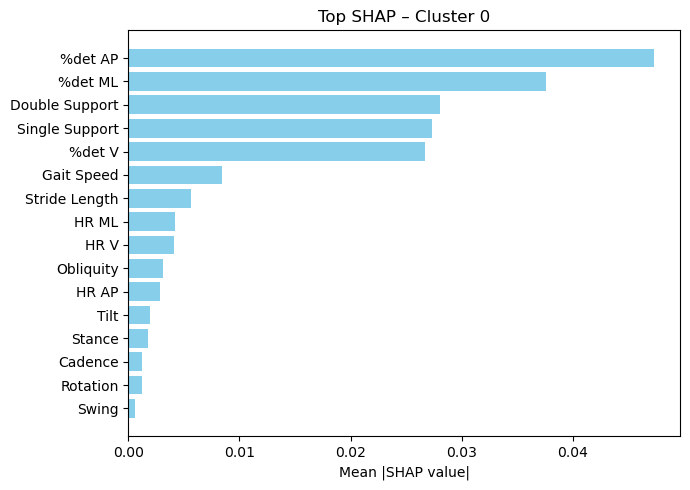


🧠 Profilazione del Cluster 1:
Le feature che maggiormente guidano le predizioni per questo cluster sono:
1. HR V
2. Obliquity
3. Double Support
Questa firma suggerisce un pattern biomeccanico distintivo che potrebbe essere associato a [INSERISCI IPOTESI CLINICA].


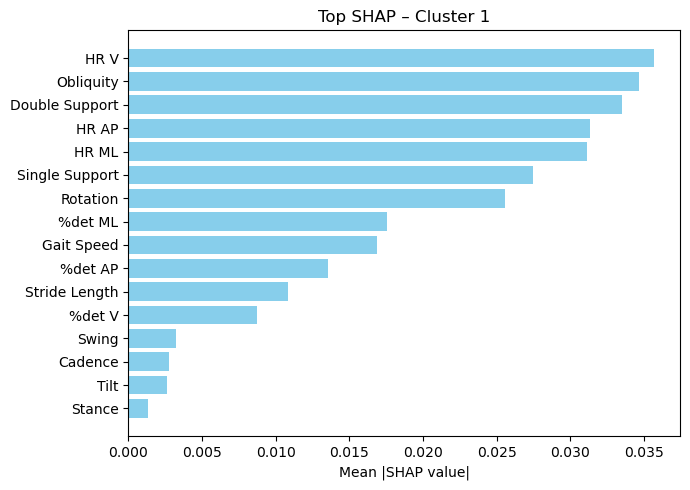


🧠 Profilazione del Cluster 2:
Le feature che maggiormente guidano le predizioni per questo cluster sono:
1. Double Support
2. Single Support
3. Gait Speed
Questa firma suggerisce un pattern biomeccanico distintivo che potrebbe essere associato a [INSERISCI IPOTESI CLINICA].


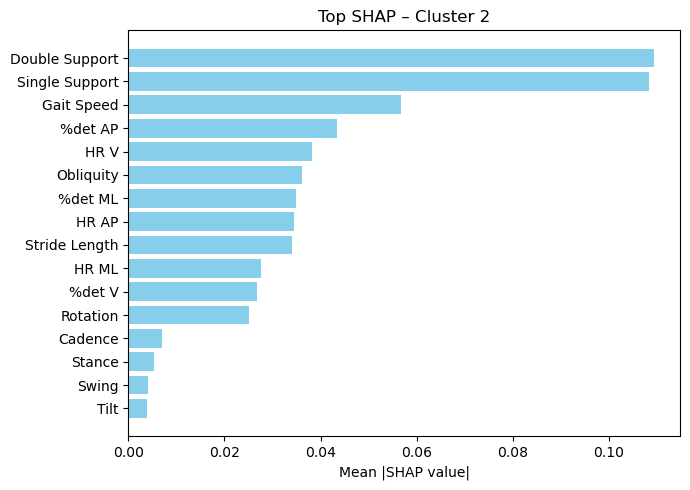


🧠 Profilazione del Cluster 3:
Le feature che maggiormente guidano le predizioni per questo cluster sono:
1. Single Support
2. Double Support
3. %det AP
Questa firma suggerisce un pattern biomeccanico distintivo che potrebbe essere associato a [INSERISCI IPOTESI CLINICA].


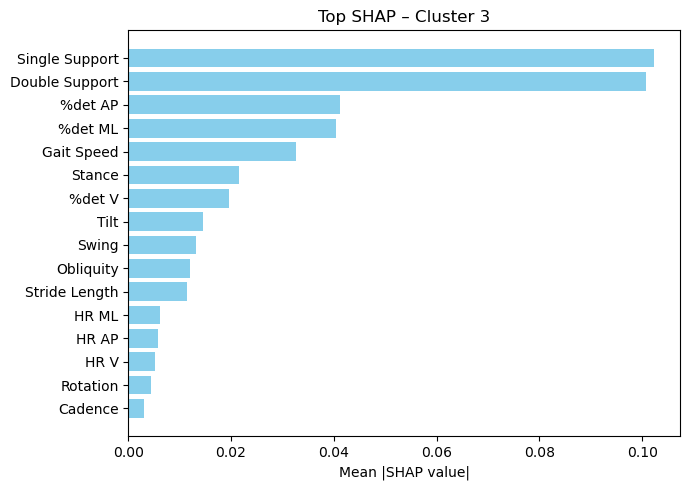


🧠 Profilazione del Cluster 4:
Le feature che maggiormente guidano le predizioni per questo cluster sono:
1. Double Support
2. Single Support
3. Gait Speed
Questa firma suggerisce un pattern biomeccanico distintivo che potrebbe essere associato a [INSERISCI IPOTESI CLINICA].


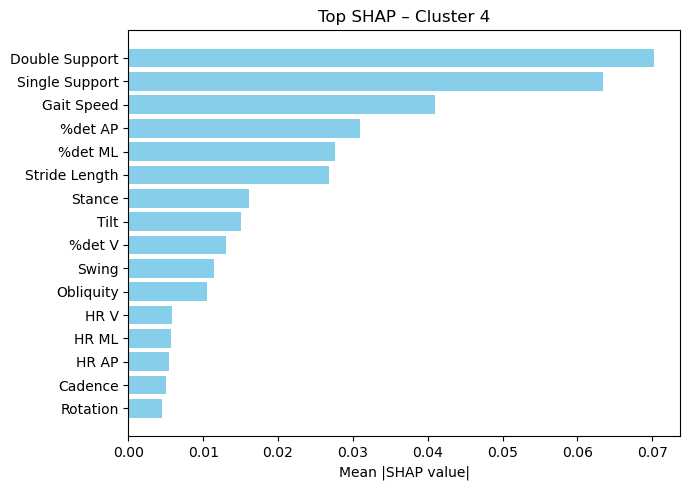

In [38]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

# 🎯 Dati e SHAP values
# Assumiamo:
# - df_valid: contiene X + colonna 'cluster'
# - X: solo le feature (senza 'cluster')
# - shap_values_all: shape (n_samples, n_features, n_classes)

# Calcolo della media assoluta dei valori SHAP per ogni classe
n_classi = shap_values_all.shape[2]
feature_names = X.columns.tolist()

for i in range(n_classi):
    # 📊 Media assoluta SHAP per ogni feature
    shap_mean = np.abs(shap_values_all[:, :, i]).mean(axis=0)
    shap_df = pd.DataFrame({
        'Feature': feature_names,
        'MeanSHAP': shap_mean
    }).sort_values(by="MeanSHAP", ascending=False)

    # 📝 Testo automatico: prime 3 feature dominanti
    top_feats = shap_df.head(3)['Feature'].tolist()
    text = (
        f"\n🧠 Profilazione del Cluster {i}:\n"
        f"Le feature che maggiormente guidano le predizioni per questo cluster sono:\n"
        f"1. {top_feats[0]}\n"
        f"2. {top_feats[1]}\n"
        f"3. {top_feats[2]}\n"
        f"Questa firma suggerisce un pattern biomeccanico distintivo "
        f"che potrebbe essere associato a [INSERISCI IPOTESI CLINICA]."
    )
    print(text)

    # 📊 Barplot visibile direttamente
    plt.figure(figsize=(7, 5))
    plt.barh(shap_df['Feature'], shap_df['MeanSHAP'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f"Top SHAP – Cluster {i}")
    plt.xlabel("Mean |SHAP value|")
    plt.tight_layout()
    plt.show()

🟩 Cluster 0
🔝 Feature principali:

%det AP, %det ML, Double Support, Single Support, %det V

🧠 Interpretazione:
Cluster guidato fortemente da stabilità dinamica: alta importanza dei determinismi AP/ML/V suggerisce che le caratteristiche di regolarità e periodicità (Recurrence Quantification) sono centrali. L'importanza di Double/Single Support rafforza l’ipotesi che qui dominino schemi di cammino più stabili o regolari. Potrebbe rappresentare soggetti compensati o meno instabili, con controllo posturale affidabile.

🟨 Cluster 1
🔝 Feature principali:

HR V, Obliquity, Double Support, HR AP, HR ML

🧠 Interpretazione:
Cluster associato a movimenti del tronco (HR) e oscillazioni posturali, soprattutto sul piano verticale. L’importanza di Obliquity (oscillazione laterale del bacino) e delle armoniche potrebbe indicare soggetti con alterato controllo del tronco o strategie adattive posturali (es. Parkinson medio-avanzato o soggetti con problemi assiali). La bassa importanza del gait speed e dei determinismi rafforza l’ipotesi di controllo assiale compromesso.

🟦 Cluster 2
🔝 Feature principali:

Double Support, Single Support, Gait Speed, %det AP

🧠 Interpretazione:
Cluster in cui il timing del passo (durata delle fasi) e la velocità sono predominanti. L’equilibrio tra Double/Single Support suggerisce che il modello identifica soggetti in cui la gestione della fase di appoggio è cruciale (es. soggetti più lenti o più insicuri). Possibile firma di andatura cauta o rallentata, tipica di soggetti con rischio di caduta o nei prodromi.

🟧 Cluster 3
🔝 Feature principali:

Single Support, Double Support, %det AP, %det ML, Gait Speed

🧠 Interpretazione:
Molto simile al cluster 2, ma qui il peso è ancora più marcato sulle fasi temporali del passo, con un’enfasi sulle componenti deterministiche. Potrebbe rappresentare un sottogruppo con andatura rallentata ma più regolare, forse in soggetti più giovani o meno sintomatici con controllo conservato. Interessante il forte peso di Single Support: potrebbe indicare soggetti che riescono ancora a sostenere bene la fase monopodalica.

🟥 Cluster 4
🔝 Feature principali:

Double Support, Single Support, Gait Speed, %det AP, %det ML

🧠 Interpretazione:
Ancora un cluster in cui le fasi del passo e la velocità sono dominanti, ma con valori di SHAP più omogenei rispetto al cluster 3. Potrebbe rappresentare una via intermedia tra soggetti disfunzionali e compensati. È un cluster interessante da confrontare clinicamente con 0 e 2, perché sembra esprimere un equilibrio biomeccanico misto, con una buona rappresentazione di quasi tutte le feature.

🧩 Conclusione
Le barplot SHAP mostrano firme coerenti e diverse tra loro:

Cluster 0 e 1 → più associati a regolarità e componenti posturali

Cluster 2, 3, 4 → dominati da tempi di supporto e velocità

In [39]:
import os
import numpy as np
import pandas as pd

# Assicurati che X e shap_values_all siano già definiti nel tuo workspace

# 📁 Output folder
output_dir = "outputs/text"
os.makedirs(output_dir, exist_ok=True)

# Template descrittivo
template = """🧠 Profilazione del Cluster {i}:

Le feature che maggiormente guidano le predizioni per questo cluster sono:
1. {f1}
2. {f2}
3. {f3}

Questa firma suggerisce un pattern biomeccanico distintivo:
- {commento}

"""

# Commenti plausibili – puoi modificarli a piacimento
commenti = {
    0: "Dominanza delle metriche di determinismo (AP/ML/V) e del supporto doppio. Probabile firma di soggetti con cammino stabile e regolare.",
    1: "Prevalenza di armoniche verticali (HR V) e oscillazioni posturali. Potenziale cluster di soggetti con deficit assiale (es. atassia o Parkinson).",
    2: "Fasi temporali e velocità dominano. Andatura più lenta o cauta, associabile a soggetti a rischio caduta.",
    3: "Timing del passo e determinismo in equilibrio. Andatura regolare, possibilmente in soggetti compensati o meno sintomatici.",
    4: "Profilo misto con equilibrio fra velocità, supporto e determinismi. Potrebbe rappresentare soggetti in transizione biomeccanica."
}

# 📝 Generazione automatica dei file di testo
for i in range(shap_values_all.shape[2]):
    mean_shap = np.abs(shap_values_all[:, :, i]).mean(axis=0)
    shap_df = pd.DataFrame({
        'Feature': X.columns,
        'MeanSHAP': mean_shap
    }).sort_values(by="MeanSHAP", ascending=False)

    top_feats = shap_df['Feature'].tolist()[:3]

    testo = template.format(
        i=i,
        f1=top_feats[0],
        f2=top_feats[1],
        f3=top_feats[2],
        commento=commenti.get(i, "[Inserire commento clinico]")
    )

    with open(f"{output_dir}/profilazione_cluster{i}.txt", "w") as f:
        f.write(testo)

print("✅ File di profilazione automatica salvati in outputs/text")

✅ File di profilazione automatica salvati in outputs/text


/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/qp/ffk__r314v1g0597vzpyysdw0000gn/T/ipykernel_43200/4121343817.py:31: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129517 (\N{COMPASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


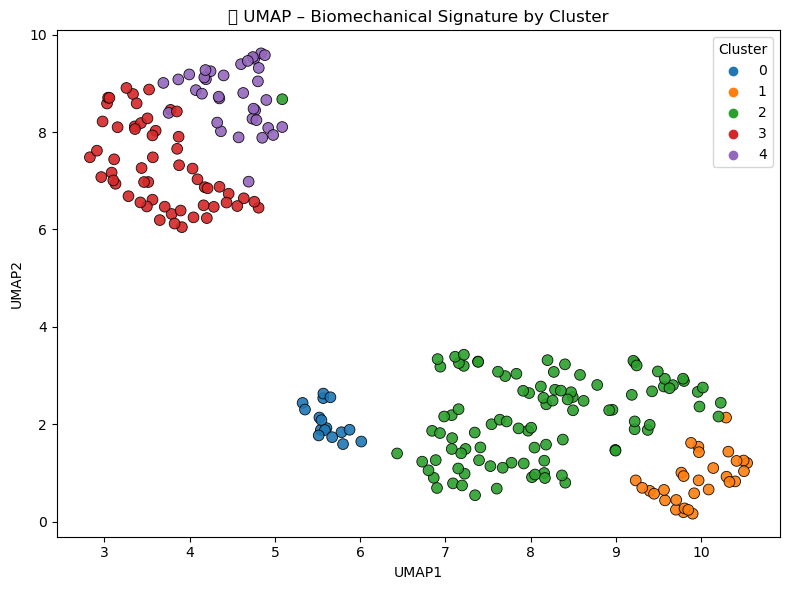

In [40]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assicurati che df_valid sia il dataframe filtrato senza outlier (-1 escluso)
# e che contenga la colonna "cluster"
# X è la matrice di feature già pronta (senza 'cluster')

# 🎯 UMAP con 2 componenti
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

# 🔗 Crea un dataframe per visualizzazione
df_umap = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
df_umap['Cluster'] = df_valid['cluster'].values  # aggiungi label cluster

# 🎨 Plot UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_umap,
    x='UMAP1', y='UMAP2',
    hue='Cluster',
    palette='tab10',
    s=60,
    alpha=0.9,
    edgecolor='k'
)
plt.title("🧭 UMAP – Biomechanical Signature by Cluster")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

CTGAN